In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from dataPath import DATA_PATH
%matplotlib inline

import matplotlib

matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (8, 8)

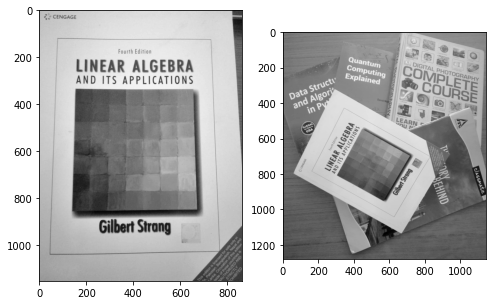

In [19]:
img1 = cv.imread(DATA_PATH + "images/book.jpeg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread(DATA_PATH + "images/book_scene.jpeg", cv.IMREAD_GRAYSCALE)

plt.subplot(121);
plt.imshow(img1)
plt.subplot(122);
plt.imshow(img2)

In [20]:
orb = cv.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

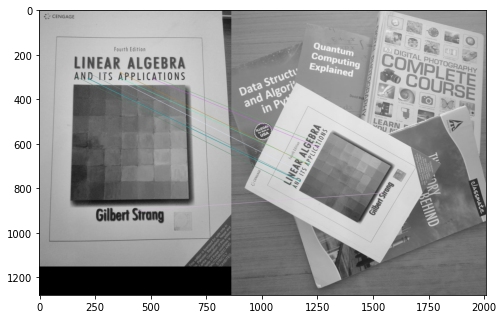

In [21]:
bf = cv.BFMatcher_create(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

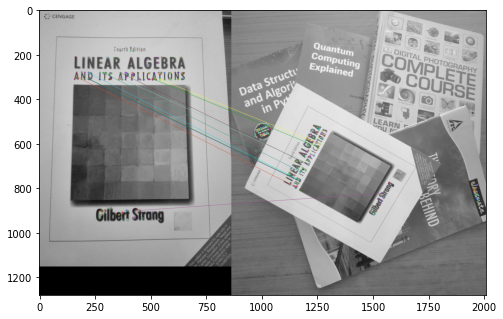

In [22]:
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1,des2)
matches = sorted(matches,key=lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None)
plt.imshow(img3)
plt.show()

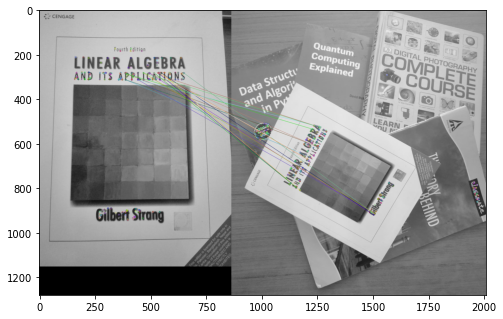

In [25]:
#FLANN based Matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(np.float32(des1),np.float32(des2),k=2)
matchMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchMask[i] = [1,0]
draw_parms = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchMask,
                  flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches[:10],None)
plt.imshow(img3)
plt.show()

